<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1D" data-toc-modified-id="1D-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1D</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Ridge:-gaussian-kernel" data-toc-modified-id="Ridge:-gaussian-kernel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ridge: gaussian kernel</a></span></li><li><span><a href="#Ridge:-polynominal-kernel" data-toc-modified-id="Ridge:-polynominal-kernel-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ridge: polynominal kernel</a></span></li><li><span><a href="#Ridge:-splines" data-toc-modified-id="Ridge:-splines-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ridge: splines</a></span></li><li><span><a href="#Support-vector-machine:-gaussian-kernel" data-toc-modified-id="Support-vector-machine:-gaussian-kernel-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Support vector machine: gaussian kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):--k-neighbors-$\oplus$-uniform-kernel-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-radius-neighbors-$\oplus$-uniform-kernel-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel</a></span></li><li><span><a href="#Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel" data-toc-modified-id="Local-weighted-average-(kernel-regression):-k-neighbors-$\oplus$--tri-cube-kernel-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-linear-$\oplus$-tri-cube-kernel-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel" data-toc-modified-id="local-regression:-k-neighbors-$\oplus$-quadratic-$\oplus$-tri-cube-kernel-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel</a></span></li><li><span><a href="#Gaussian-process" data-toc-modified-id="Gaussian-process-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Gaussian process</a></span></li><li><span><a href="#Decision--tree" data-toc-modified-id="Decision--tree-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Decision  tree</a></span></li><li><span><a href="#random-forest" data-toc-modified-id="random-forest-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>random forest</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Gradient-boosting-decision-tree" data-toc-modified-id="Gradient-boosting-decision-tree-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Gradient boosting decision tree</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.16"><span class="toc-item-num">1.16&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd


%matplotlib inline
from IPython.display import display
import pandas as pd
from sklearn.metrics import mean_squared_error
def RMSE(y, y2):
    return np.sqrt(mean_squared_error(y, y2))

# 1D

## Data

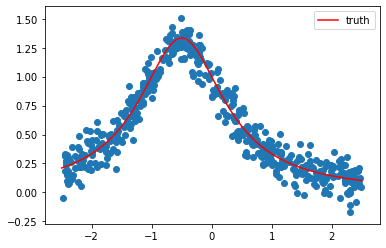

In [2]:
def f(X):
    return 1 / (1 + (X[:,0])**2 + X[:,0]) 

SIGMA=0.1
N_train = 500
np.random.seed(0)

X = 5*(np.random.rand(N_train, 1) - 0.5)
y = f(X) + SIGMA*np.random.randn(N_train)
X_plt = 5*(np.linspace(0,1,N_train) - 0.5).reshape(-1,1)

plt.plot(X_plt, f(X_plt), label="truth", color="red")
plt.scatter(X, y)
plt.legend()
plt.show()

numbers = {}
def plot1D(model, X_plt, label=None):
    yhat= model.predict(X_plt)
    rmse = RMSE(yhat, f(X_plt))
    if label is None:
        if type(model) is GridSearchCV:
            numbers[str(model.best_estimator_)] = rmse
        else:
            numbers[str(model)] = rmse
    else:
        numbers[label] = rmse
    
    plt.title("RMSE = %.2E"%rmse)
    plt.plot(X_plt, f(X_plt), label="truth")
    plt.plot(X_plt, yhat, label="predict")
    plt.legend()
    plt.show()

## Ridge: gaussian kernel

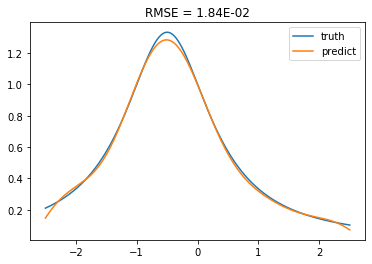

KernelRidge(alpha=0.005, coef0=1, degree=3, gamma=0.5, kernel='rbf',
            kernel_params=None)


In [3]:
param_grid = {
    "alpha" : [1E-4, 1E-3, 5E-3, 1E-2, 1E-1, 5E-1, 1E0],
    "kernel": ["rbf"],
    "gamma":[0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]
}

kr = KernelRidge()
gscv = GridSearchCV(kr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="ridge: gaussian kernel")
print(gscv.best_estimator_)

## Ridge: polynominal kernel

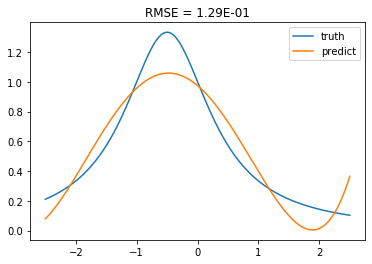

KernelRidge(alpha=1, coef0=1, degree=4, gamma=2, kernel='poly',
            kernel_params=None)


In [4]:
param_grid = {
    "alpha": [1E-2, 0.1, 1, 2, 5, 10],
    "kernel":['poly'],
    "degree": [4],
    "coef0" : [0.5, 1, 2, 5, 10],
    "gamma":[1E-2, 0.1, 0.5, 1, 2]
}

kr = KernelRidge()
gscv = GridSearchCV(kr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="ridge: polynominal kernel")
print(gscv.best_estimator_)

## Ridge: splines

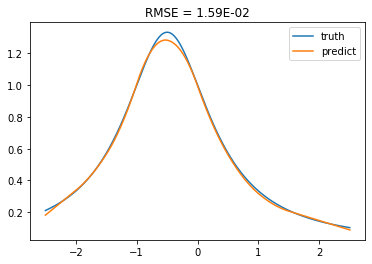

QuadraticSplineRegression(knots[9]=[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ],alpha=0.0E+00,alphac=0.0E+00)


In [5]:
import quadratic_spline_regression
from quadratic_spline_regression import QuadraticSplineRegression
#from imp import reload
#reload(quadratic_spline_regression)

param_grid = {
    "knots":[np.linspace(-2,2,6), np.linspace(-2,2,8), np.linspace(-2,2,9),  np.linspace(-2,2,10) , np.linspace(-2,2,12)],
    "alpha":[0, 1E-10, 1E-9,1E-8, 1E-6, 1E-3, 1E-1],
    "alphac":[0, 1E-10, 1E-9,1E-8, 1E-6, 1E-3, 1E-1],
}

qsr=QuadraticSplineRegression()
gscv = GridSearchCV(qsr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="ridge: splines")
print(gscv.best_estimator_)

## Support vector machine: gaussian kernel

In [ ]:
param_grid = {
    "C" : [1E6, 1E5, 1E3, 1, 0.1], "epsilon":[0.02, 0.05, 0.1, 0.5], "kernel": ["rbf"], "gamma":[0.1, 0.25, 0.5, 0.75, 1]
}

svr = SVR(kernel="rbf")
gscv = GridSearchCV(svr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt)
print(gscv.best_estimator_)

## Local weighted average (kernel regression):  k-neighbors $\oplus$ uniform kernel

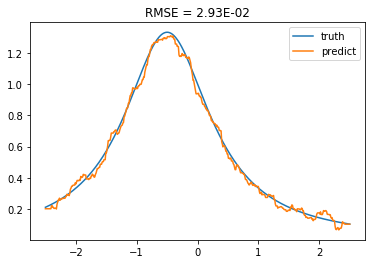

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')


In [6]:
param_grid = {
    "n_neighbors" : [1,2,4,8,16,32,64,128]
}

knr = KNeighborsRegressor()
gscv = GridSearchCV(knr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="k-nn")
print(gscv.best_estimator_)

## Local weighted average (kernel regression): radius neighbors $\oplus$ uniform kernel

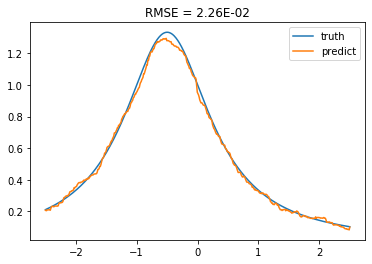

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2,
                         radius=0.19473684210526315, weights='uniform')


In [7]:
param_grid = {
    "radius": np.linspace(0.1, 1, 20)
}

rnr = RadiusNeighborsRegressor()
gscv = GridSearchCV(rnr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, "radius-nn")
print(gscv.best_estimator_)

## Local weighted average (kernel regression): k-neighbors $\oplus$  tri-cube kernel

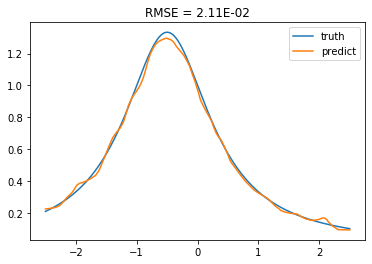

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=0.100000, alpha=1.00E-01, adaptive=1, degree=0)


In [8]:
from LocalRegressor import LocalRegressor

param_grid = {
    "degree": [0],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "gamma": np.linspace(0.1, 100, 100),        
}

rnr = LocalRegressor()
gscv = GridSearchCV(rnr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="knn tri-cube")
print(gscv.best_estimator_)


## local regression: k-neighbors $\oplus$ linear $\oplus$ tri-cube kernel

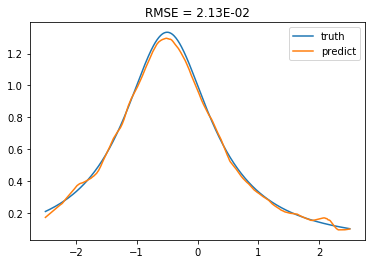

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=1.00E-01, adaptive=1, degree=1)


In [9]:
param_grid = {
    "degree": [1],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),        
}

rnr = LocalRegressor()
gscv = GridSearchCV(rnr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="local linear regression")
print(gscv.best_estimator_)

## local regression: k-neighbors $\oplus$ quadratic $\oplus$ tri-cube kernel

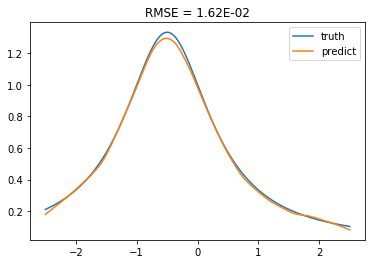

LocalLinearRegression(kernel='tri-cube', radius=1.000000, gamma=1.000000, alpha=2.89E-01, adaptive=1, degree=2)


In [10]:
param_grid = {
    "degree": [2],
    "kernel": ["tri-cube"],
    "adaptive": [True],
    "alpha": np.linspace(0.1, 1, 20),        
}

rnr = LocalRegressor()
gscv = GridSearchCV(rnr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="local quadratic regression")
print(gscv.best_estimator_)

## Gaussian process

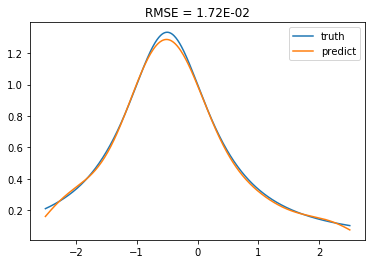

0.505**2 * RBF(length_scale=0.826) + WhiteKernel(noise_level=0.00976)


In [11]:
gpr = GaussianProcessRegressor(kernel=ConstantKernel(1)*RBF(1) + WhiteKernel(0.1), n_restarts_optimizer=10)
fitter = gpr
fitter.fit(X, y)
plot1D(fitter, X_plt, label="gaussian process")
print(gpr.kernel_)

## Decision  tree

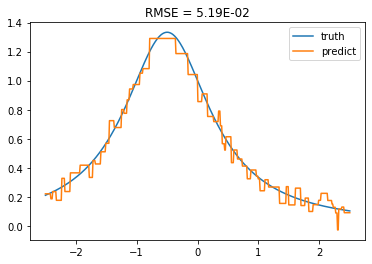

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [12]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    "criterion": ['mse'],
    "splitter": ["best"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],        
}

dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="decision tree")
print(gscv.best_estimator_)

## random forest

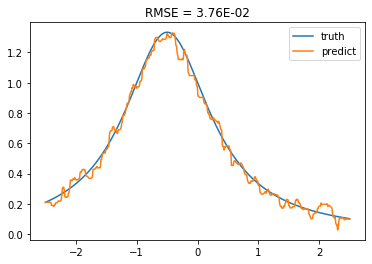

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [13]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [50, 100, 200, 500],
    "criterion": ["mse"],
    "max_depth": [5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 10],
}

rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="random forest")
print(gscv.best_estimator_)

## AdaBoost

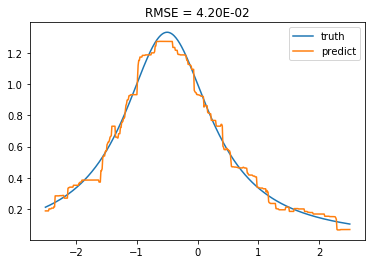

AdaBoostRegressor(base_estimator=None, learning_rate=2.0, loss='exponential',
                  n_estimators=150, random_state=None)


In [14]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    "n_estimators": [20, 50, 100, 150],
    "learning_rate": [0.5, 1.0, 2.0],
    "loss": ["linear", 'square', 'exponential']
}

abr = AdaBoostRegressor()
gscv = GridSearchCV(abr, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="AdaBoost")
print(gscv.best_estimator_)

## Gradient boosting decision tree

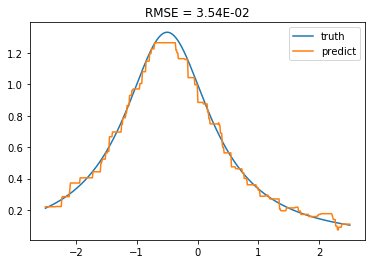

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "learning_rate": [0.02, 0.05, 0.1, 0.5],
    "min_samples_leaf": [1, 2, 5, 10],
    "loss": ["ls", 'lad'],
    "max_depth": [1, 2, 3]
}

est = GradientBoostingRegressor()
gscv = GridSearchCV(est, param_grid=param_grid, cv=2)
fitter = gscv
fitter.fit(X, y)
plot1D(fitter, X_plt, label="GBDT")
print(gscv.best_estimator_)

## Summary

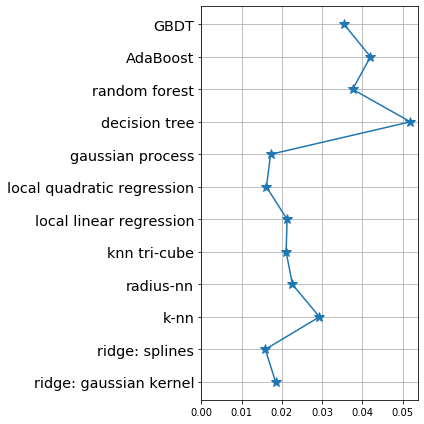

In [16]:
keys = list(numbers.keys())
values = list(numbers.values())

def remove(k):
    if k in keys:
        i = keys.index(k)
        del keys[i]
        del values[i]

remove("ridge: polynominal kernel")

plt.figure(figsize=(6,6))
plt.plot(values, range(len(keys)), marker="*", markersize=10)
plt.yticks(ticks=range(len(keys)), labels=keys,fontsize="x-large")
plt.xlim((0,None))
plt.tight_layout()
plt.grid()
plt.show()